In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

import warnings
warnings.filterwarnings('ignore')

# Installing PyDrive to connect to Google Drive

In [2]:
# !pip install -U -q PyDrive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create a PyDrive client

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Getting the file_id

In [5]:
fileDownloaded = drive.CreateFile({'id':'1W0RktMWlb9SO1DxoEvCNCBZr-TQblJ8L'})
# https://drive.google.com/file/d/1W0RktMWlb9SO1DxoEvCNCBZr-TQblJ8L/view?usp=share_link

In [6]:
fileDownloaded.GetContentFile('startup - startup.csv')

# Reading CSV file

In [7]:
df = pd.read_csv('startup - startup.csv')

In [8]:
df.head()

Sr_No        Date                  Startup_Name    Industry_Vertical  \
0      1  03-02-2009                        BYJU’S               E-Tech   
1      2  2009-03-03                        Shuttl       Transportation   
2      3  03-04-2009                     Mamaearth           E-commerce   
3      4  03-05-2009  https://www.wealthbucket.in/              FinTech   
4      5  03-06-2009                        Fashor  Fashion and Apparel   

                             SubVertical       City  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

              Investors_Name       Investment_Type Amount_in_USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growth Equity              Series C     80,48,394     NaN  
2      Sequoia Capital India              Series B   1,83,58,860     NaN  
3             Vinod Khatumal          Pre-series A     30,00,000     NaN  
4    Sprout Venture Partners            Seed Round     18,00,000     NaN

In [9]:
df.shape

(8052, 10)

In [10]:
df.columns

Index(['Sr_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'City', 'Investors_Name', 'Investment_Type', 'Amount_in_USD',
       'Remarks'],
      dtype='object')

# Listing Top 10 Categories of Categorical fields


In [11]:
df.groupby('Investment_Type')['Investment_Type'].agg(['count']).sort_values('count',ascending=False)[:10]

count
Investment_Type       
Series A          1624
Seed              1486
Series B          1076
Private Equity     991
Seed Funding       851
Series C           750
Series D           414
Series E           207
Unknown            128
Pre-Seed            98

In [12]:
df.groupby('Industry_Vertical')['Industry_Vertical'].agg(['count']).sort_values('count',ascending=False)[:10]

count
Industry_Vertical             
Consumer Internet          837
Technology                 835
B2B Software               632
eCommerce                  377
Finance                    327
Cloud Computing            288
Artificial Intelligence    284
Blockchain                 244
Education                  149
Cyber Security             147

In [13]:
df.groupby('SubVertical')['SubVertical'].agg(['count']).sort_values('count',ascending=False)[:5]

count
SubVertical                                         
Online Pharmacy                                   44
Online lending platform                           35
Cold Press Juice manufacturer & seller            28
Marketplace for International Freight             28
Online business-to-business (B2B) marketplace     28

# Data Cleaning

In [14]:
# df.fillna(' ',inplace = True)
df1=df.replace("\\\\",'')

In [15]:
df1.head()

Sr_No        Date                  Startup_Name    Industry_Vertical  \
0      1  03-02-2009                        BYJU’S               E-Tech   
1      2  2009-03-03                        Shuttl       Transportation   
2      3  03-04-2009                     Mamaearth           E-commerce   
3      4  03-05-2009  https://www.wealthbucket.in/              FinTech   
4      5  03-06-2009                        Fashor  Fashion and Apparel   

                             SubVertical       City  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

              Investors_Name       Investment_Type Amount_in_USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growth Equity              Series C     80,48,394     NaN  
2      Sequoia Capital India              Series B   1,83,58,860     NaN  
3             Vinod Khatumal          Pre-series A     30,00,000     NaN  
4    Sprout Venture Partners            Seed Round     18,00,000     NaN

In [16]:
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1['Date'] = df1['Date'].apply(lambda x : x.strftime('%d/%m/%Y'))
# df1['Date'] = df1['Date'].astype('datetime64')

In [17]:
df1['Date'].unique()

array(['02/03/2009', '03/03/2009', '04/03/2009', ..., '06/05/2020',
       '07/05/2020', '08/05/2020'], dtype=object)

In [18]:
df["Investors_Name"]=df["Investors_Name"].str.replace("\\\\xc2","")             #Data Cleaning for Investors_Name Field
df["Investors_Name"]=df["Investors_Name"].str.replace("\\\\xa0","")

In [19]:
df1=df.drop(['City','Remarks'],axis=1)
df1.isnull().sum()

Sr_No                   0
Date                    0
Startup_Name            0
Industry_Vertical     171
SubVertical           947
Investors_Name         17
Investment_Type         4
Amount_in_USD        2643
dtype: int64

In [20]:

df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace(",","")             #Data Cleaning for Amount_in_USD Field
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("+","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace(" ","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("undisclosed","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("unknown","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("Undisclosed","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("PrivateEquity","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("\\\\\\\\xc2","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("\\\\\\\\xa0","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("N/A","")
df1["Amount_in_USD"]=df1["Amount_in_USD"].str.replace("NaN","")

df1["Amount_in_USD"]= df1["Amount_in_USD"].apply(lambda x: 0 if x == '' else x)           #replacing blank space with 0
   

In [21]:
# df1["Amount_in_USD"].astype(float)  
# df1
df['Amount_in_USD'] = pd.to_numeric(df['Amount_in_USD'],errors='coerce')
print(df.dtypes)

Sr_No                  int64
Date                  object
Startup_Name          object
Industry_Vertical     object
SubVertical           object
City                  object
Investors_Name        object
Investment_Type       object
Amount_in_USD        float64
Remarks               object
dtype: object


In [22]:
df1.isnull().sum()

Sr_No                   0
Date                    0
Startup_Name            0
Industry_Vertical     171
SubVertical           947
Investors_Name         17
Investment_Type         4
Amount_in_USD        2643
dtype: int64

In [23]:
df1.dropna(inplace=True)

In [24]:
df1.shape

(4728, 8)

In [25]:
df1.isnull().sum()

Sr_No                0
Date                 0
Startup_Name         0
Industry_Vertical    0
SubVertical          0
Investors_Name       0
Investment_Type      0
Amount_in_USD        0
dtype: int64

In [26]:
# df1["Amount_in_USD"].unique()

In [27]:
# median_val=df1['Amount_in_USD'].median()
# df1['Amount_in_USD']=df1['Amount_in_USD'].fillna(value=median_val)
# # df1

In [28]:
df1.isnull().sum()

Sr_No                0
Date                 0
Startup_Name         0
Industry_Vertical    0
SubVertical          0
Investors_Name       0
Investment_Type      0
Amount_in_USD        0
dtype: int64

In [29]:
df1.shape

(4728, 8)

In [30]:
df1['Sr_No'] = range(1, df1.shape[0]+1)

In [31]:
df1.head()

Sr_No        Date                  Startup_Name    Industry_Vertical  \
0      1  03-02-2009                        BYJU’S               E-Tech   
1      2  2009-03-03                        Shuttl       Transportation   
2      3  03-04-2009                     Mamaearth           E-commerce   
3      4  03-05-2009  https://www.wealthbucket.in/              FinTech   
4      5  03-06-2009                        Fashor  Fashion and Apparel   

                             SubVertical             Investors_Name  \
0                             E-learning    Tiger Global Management   
1              App based shuttle service  Susquehanna Growth Equity   
2  Retailer of baby and toddler products      Sequoia Capital India   
3                      Online Investment             Vinod Khatumal   
4            Embroiled Clothes For Women    Sprout Venture Partners   

        Investment_Type Amount_in_USD  
0  Private Equity Round     200000000  
1              Series C       8048394  
2              Series B      18358860  
3          Pre-series A       3000000  
4            Seed Round       1800000

In [32]:
max_val1 = df1['Sr_No'].max()
max_val1

4728

In [33]:
df1['Date'] = pd.to_datetime(df1['Date'])
# print(type(datetime.today()))
df1['Days_Active'] =(datetime.today())- df1['Date'] 
# df1['Days_Active']=df1['Days_Active']/ np.timedelta64(1, 'D')
df1['Days_Active']=df1['Days_Active'].dt.days
# df1.columns

In [34]:
df2=df1.copy()


In [35]:
df2.columns

Index(['Sr_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'Investors_Name', 'Investment_Type', 'Amount_in_USD', 'Days_Active'],
      dtype='object')

In [36]:
# df1['Days_Active'].unique

In [37]:
df1.columns

Index(['Sr_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'Investors_Name', 'Investment_Type', 'Amount_in_USD', 'Days_Active'],
      dtype='object')

In [38]:
df1.corr()
df1

Sr_No       Date                  Startup_Name    Industry_Vertical  \
0         1 2009-03-02                        BYJU’S               E-Tech   
1         2 2009-03-03                        Shuttl       Transportation   
2         3 2009-03-04                     Mamaearth           E-commerce   
3         4 2009-03-05  https://www.wealthbucket.in/              FinTech   
4         5 2009-03-06                        Fashor  Fashion and Apparel   
...     ...        ...                           ...                  ...   
8046   4724 2019-11-20                 Grabhouse.com    Consumer Internet   
8048   4725 2019-11-22                      Graphene            eCommerce   
8049   4726 2019-11-25                Mad Street Den            ECommerce   
8050   4727 2019-11-26                     Simplotel    Consumer Internet   
8051   4728 2019-11-27              couponmachine.in      Food & Beverage   

                                     SubVertical             Investors_Name  \
0                                     E-learning    Tiger Global Management   
1                      App based shuttle service  Susquehanna Growth Equity   
2          Retailer of baby and toddler products      Sequoia Capital India   
3                              Online Investment             Vinod Khatumal   
4                    Embroiled Clothes For Women    Sprout Venture Partners   
...                                          ...                        ...   
8046          Education & learning Tech platform                Bondoo Baby   
8048           Online Doctor Consulting platform                  BONDS.COM   
8049  Self-Branded Websites & Apps for Ecommerce                     Bondsy   
8050      Cold Press Juice manufacturer & seller          Bone Therapeutics   
8051                     Online lending platform                 Bonegrafix   

           Investment_Type Amount_in_USD  Days_Active  
0     Private Equity Round     200000000         5042  
1                 Series C       8048394         5041  
2                 Series B      18358860         5040  
3             Pre-series A       3000000         5039  
4               Seed Round       1800000         5038  
...                    ...           ...          ...  
8046                  Seed       3000000         1127  
8048                  Seed      25000000         1125  
8049              Series B       5000000         1122  
8050                  Seed        500000         1121  
8051              Series C        500000         1120  

[4728 rows x 9 columns]

In [39]:
# df1['SubVertical'].unique 

In [40]:
Industry_Vertical_top20=[x for x in df1.Industry_Vertical.value_counts().sort_values(ascending=False).head(20).index]
Industry_Vertical_top20

['Consumer Internet',
 'Technology',
 'B2B Software',
 'eCommerce',
 'Finance',
 'Cloud Computing',
 'Artificial Intelligence',
 'Blockchain',
 'Health Care',
 'Education',
 'Cyber Security',
 'Logistics',
 'FinTech',
 'ECommerce',
 'Healthcare',
 'Food and Beverage',
 'E-Commerce Store',
 'Marketplace',
 'Gaming',
 'Investing']

In [41]:
SubVertical_top20=[x for x in df1.SubVertical.value_counts().sort_values(ascending=False).head(20).index]
SubVertical_top20

['Online Pharmacy',
 'Pet Parenting mobile app',
 'Online jewellery marketplace',
 'Self-Branded Websites & Apps for Ecommerce',
 'Drone Manufacturing',
 'Online Doctor Consulting platform',
 'Online lending platform',
 'Cold Press Juice manufacturer & seller',
 'On-Demand Washing & Dry Cleaning Services',
 'Online business-to-business (B2B) marketplace',
 'Mobile App based Fashion Network',
 'Self-Driven Cab booking platform',
 'medical grade wearable patch maker',
 'Online fashion rental platform',
 'Online Consumer Lending platform',
 'Marketplace for International Freight',
 'Doctor Search Mobile App',
 'Rental property search portal',
 'Media Technology Solutions',
 'Fitness center aggregator & Booking mobile app']

In [42]:
Investment_Type_top20=[x for x in df1.Investment_Type.value_counts().sort_values(ascending=False).head(20).index]
Investment_Type_top20

['Series A',
 'Seed',
 'Series B',
 'Series C',
 'Private Equity',
 'Series D',
 'Seed Funding',
 'Series E',
 'Unknown',
 'Series F',
 'Pre-Seed',
 'Seed/ Angel Funding',
 'Series G',
 'Seed / Angel Funding',
 'Angel',
 'Seed/Angel Funding',
 'Debt Financing',
 'Debt Funding',
 'Seed Round',
 'ICO']

In [43]:
df1.head()

Sr_No       Date                  Startup_Name    Industry_Vertical  \
0      1 2009-03-02                        BYJU’S               E-Tech   
1      2 2009-03-03                        Shuttl       Transportation   
2      3 2009-03-04                     Mamaearth           E-commerce   
3      4 2009-03-05  https://www.wealthbucket.in/              FinTech   
4      5 2009-03-06                        Fashor  Fashion and Apparel   

                             SubVertical             Investors_Name  \
0                             E-learning    Tiger Global Management   
1              App based shuttle service  Susquehanna Growth Equity   
2  Retailer of baby and toddler products      Sequoia Capital India   
3                      Online Investment             Vinod Khatumal   
4            Embroiled Clothes For Women    Sprout Venture Partners   

        Investment_Type Amount_in_USD  Days_Active  
0  Private Equity Round     200000000         5042  
1              Series C       8048394         5041  
2              Series B      18358860         5040  
3          Pre-series A       3000000         5039  
4            Seed Round       1800000         5038

In [44]:
for label in Industry_Vertical_top20:
    df1[label]=np.where(df1['Industry_Vertical'] == label,1,0)
for label in SubVertical_top20:
    df1[label]=np.where(df1['SubVertical'] == label,1,0)
for label in Investment_Type_top20:
    df1[label]=np.where(df1['Investment_Type'] == label,1,0)
encoder_df=df1[Industry_Vertical_top20+SubVertical_top20+Investment_Type_top20]
encoder_df

Consumer Internet  Technology  B2B Software  eCommerce  Finance  \
0                     0           0             0          0        0   
1                     0           0             0          0        0   
2                     0           0             0          0        0   
3                     0           0             0          0        0   
4                     0           0             0          0        0   
...                 ...         ...           ...        ...      ...   
8046                  1           0             0          0        0   
8048                  0           0             0          1        0   
8049                  0           0             0          0        0   
8050                  1           0             0          0        0   
8051                  0           0             0          0        0   

      Cloud Computing  Artificial Intelligence  Blockchain  Health Care  \
0                   0                        0           0            0   
1                   0                        0           0            0   
2                   0                        0           0            0   
3                   0                        0           0            0   
4                   0                        0           0            0   
...               ...                      ...         ...          ...   
8046                0                        0           0            0   
8048                0                        0           0            0   
8049                0                        0           0            0   
8050                0                        0           0            0   
8051                0                        0           0            0   

      Education  ...  Pre-Seed  Seed/ Angel Funding  Series G  \
0             0  ...         0                    0         0   
1             0  ...         0                    0         0   
2             0  ...         0                    0         0   
3             0  ...         0                    0         0   
4             0  ...         0                    0         0   
...         ...  ...       ...                  ...       ...   
8046          0  ...         0                    0         0   
8048          0  ...         0                    0         0   
8049          0  ...         0                    0         0   
8050          0  ...         0                    0         0   
8051          0  ...         0                    0         0   

      Seed / Angel Funding  Angel  Seed/Angel Funding  Debt Financing  \
0                        0      0                   0               0   
1                        0      0                   0               0   
2                        0      0                   0               0   
3                        0      0                   0               0   
4                        0      0                   0               0   
...                    ...    ...                 ...             ...   
8046                     0      0                   0               0   
8048                     0      0                   0               0   
8049                     0      0                   0               0   
8050                     0      0                   0               0   
8051                     0      0                   0               0   

      Debt Funding  Seed Round  ICO  
0                0           0    0  
1                0           0    0  
2                0           0    0  
3                0           0    0  
4                0           1    0  
...            ...         ...  ...  
8046             0           0    0  
8048             0           0    0  
8049             0           0    0  
8050             0           0    0  
8051             0           0    0  

[4728 rows x 60 columns]

# **One Hot Encoding**

In [45]:
from numpy import array
from numpy import argmax

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
Industry_Vertical_df=pd.DataFrame(onehot_encoder.fit_transform(df1[['Industry_Vertical']])).drop_duplicates()
Industry_Vertical_encoded = pd.DataFrame(Industry_Vertical_df)
SubVertical_df=pd.DataFrame(onehot_encoder.fit_transform(df1[['SubVertical']])).drop_duplicates()
SubVertical_encoded = pd.DataFrame(SubVertical_df)
Investment_Type_df=pd.DataFrame(onehot_encoder.fit_transform(df1[['Investment_Type']])).drop_duplicates()
Investment_Type_encoded = pd.DataFrame(Investment_Type_df)
df1.columns

Index(['Sr_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical',
       'Investors_Name', 'Investment_Type', 'Amount_in_USD', 'Days_Active',
       'Consumer Internet', 'Technology', 'B2B Software', 'eCommerce',
       'Finance', 'Cloud Computing', 'Artificial Intelligence', 'Blockchain',
       'Health Care', 'Education', 'Cyber Security', 'Logistics', 'FinTech',
       'ECommerce', 'Healthcare', 'Food and Beverage', 'E-Commerce Store',
       'Marketplace', 'Gaming', 'Investing', 'Online Pharmacy',
       'Pet Parenting mobile app', 'Online jewellery marketplace',
       'Self-Branded Websites & Apps for Ecommerce', 'Drone Manufacturing',
       'Online Doctor Consulting platform', 'Online lending platform',
       'Cold Press Juice manufacturer & seller',
       'On-Demand Washing & Dry Cleaning Services',
       'Online business-to-business (B2B) marketplace',
       'Mobile App based Fashion Network', 'Self-Driven Cab booking platform',
       'medical grade wearable pa

In [46]:
final_df=df1.copy()
final_df=final_df.drop(['Startup_Name','Investors_Name'],axis='columns')
final_df

Sr_No       Date    Industry_Vertical  \
0         1 2009-03-02               E-Tech   
1         2 2009-03-03       Transportation   
2         3 2009-03-04           E-commerce   
3         4 2009-03-05              FinTech   
4         5 2009-03-06  Fashion and Apparel   
...     ...        ...                  ...   
8046   4724 2019-11-20    Consumer Internet   
8048   4725 2019-11-22            eCommerce   
8049   4726 2019-11-25            ECommerce   
8050   4727 2019-11-26    Consumer Internet   
8051   4728 2019-11-27      Food & Beverage   

                                     SubVertical       Investment_Type  \
0                                     E-learning  Private Equity Round   
1                      App based shuttle service              Series C   
2          Retailer of baby and toddler products              Series B   
3                              Online Investment          Pre-series A   
4                    Embroiled Clothes For Women            Seed Round   
...                                          ...                   ...   
8046          Education & learning Tech platform                  Seed   
8048           Online Doctor Consulting platform                  Seed   
8049  Self-Branded Websites & Apps for Ecommerce              Series B   
8050      Cold Press Juice manufacturer & seller                  Seed   
8051                     Online lending platform              Series C   

     Amount_in_USD  Days_Active  Consumer Internet  Technology  B2B Software  \
0        200000000         5042                  0           0             0   
1          8048394         5041                  0           0             0   
2         18358860         5040                  0           0             0   
3          3000000         5039                  0           0             0   
4          1800000         5038                  0           0             0   
...            ...          ...                ...         ...           ...   
8046       3000000         1127                  1           0             0   
8048      25000000         1125                  0           0             0   
8049       5000000         1122                  0           0             0   
8050        500000         1121                  1           0             0   
8051        500000         1120                  0           0             0   

      ...  Pre-Seed  Seed/ Angel Funding  Series G  Seed / Angel Funding  \
0     ...         0                    0         0                     0   
1     ...         0                    0         0                     0   
2     ...         0                    0         0                     0   
3     ...         0                    0         0                     0   
4     ...         0                    0         0                     0   
...   ...       ...                  ...       ...                   ...   
8046  ...         0                    0         0                     0   
8048  ...         0                    0         0                     0   
8049  ...         0                    0         0                     0   
8050  ...         0                    0         0                     0   
8051  ...         0                    0         0                     0   

      Angel  Seed/Angel Funding  Debt Financing  Debt Funding  Seed Round  ICO  
0         0                   0               0             0           0    0  
1         0                   0               0             0           0    0  
2         0                   0               0             0           0    0  
3         0                   0               0             0           0    0  
4         0                   0               0             0           1    0  
...     ...                 ...             ...           ...         ...  ...  
8046      0                   0               0             0           0    0  
8048      0                   

In [47]:
final_df.dtypes

Sr_No                          int64
Date                  datetime64[ns]
Industry_Vertical             object
SubVertical                   object
Investment_Type               object
                           ...      
Seed/Angel Funding             int64
Debt Financing                 int64
Debt Funding                   int64
Seed Round                     int64
ICO                            int64
Length: 67, dtype: object

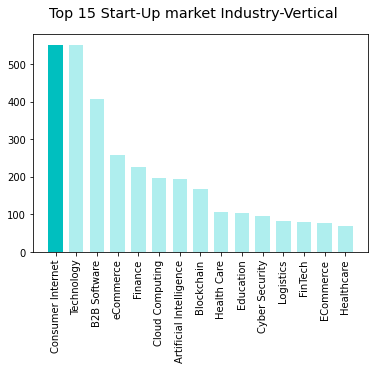

In [48]:
height = final_df['Industry_Vertical'].value_counts()[:15].tolist()
bars =  final_df['Industry_Vertical'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market Industry-Vertical", fontdict=None, position= [0.48,1.05],size = 'x-large')
plt.show()

In [49]:
final_df['Amount_in_USD']=final_df['Amount_in_USD'].astype('float')

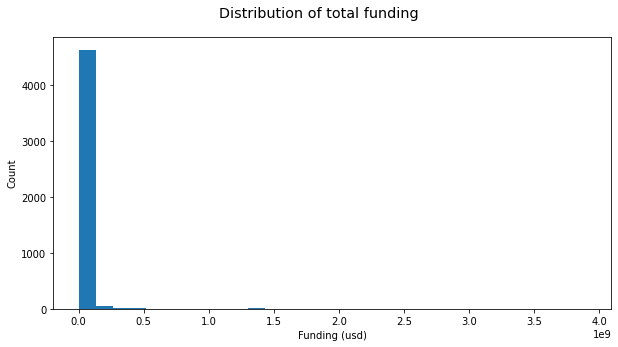

In [50]:
plt.rcParams['figure.figsize'] = 10,5
plt.hist(final_df['Amount_in_USD'], bins=30)
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of total funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

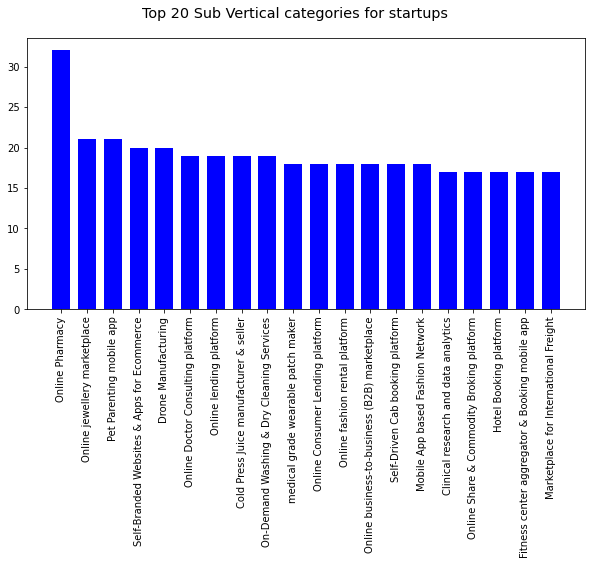

In [51]:
plt.rcParams['figure.figsize'] = 10,5

height = final_df['SubVertical'].value_counts()[:20].tolist()
bars =  final_df['SubVertical'].value_counts()[:20].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['blue']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 20 Sub Vertical categories for startups", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

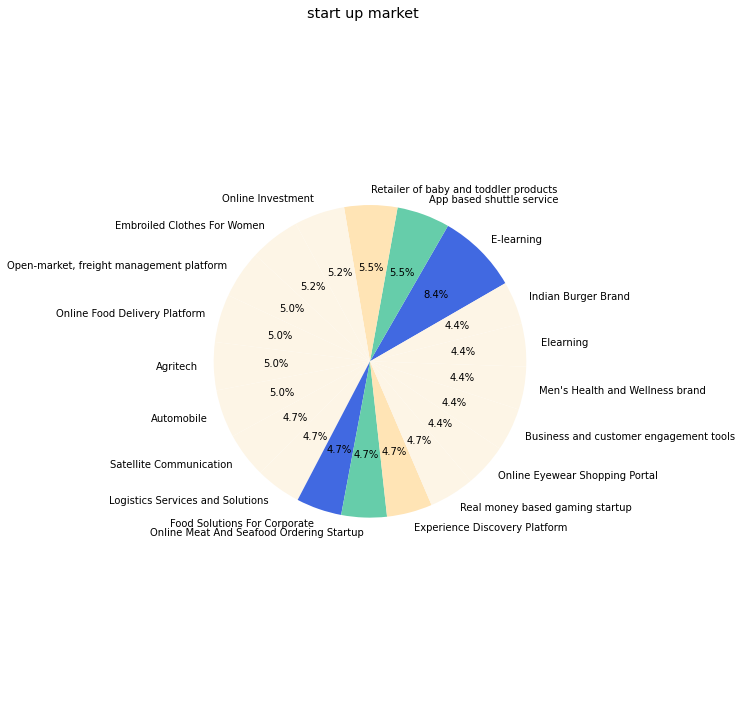

Most of start up market is about E-learning Platforms


In [52]:
from six import print_
plt.rcParams['figure.figsize'] =10,10
labels = list(final_df['SubVertical'][:20])
# print(labels)
sizes=list(final_df['SubVertical'].value_counts().sort_values(ascending=False)[:20])
# sizes = list(final_df['Industry_Vertical'])+[100-final_df['Industry_Vertical'].sum()]
# print(sizes)
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()
print('Most of start up market is about E-learning Platforms')

# **Linear Regression**

In [53]:
# get the locations
# final_df=final_df.drop(['Date'],axis='columns')
# x = df2.iloc[:, :-1]
# y = df2.iloc[:, -1]
# x = final_df['Days_Active']
# y = final_df['Amount_in_USD']

#Getting only nesscessary columns
x = np.array(final_df['Days_Active']).reshape(-1, 1)
y = np.array(final_df['Amount_in_USD']).reshape(-1, 1)

#train_test_data_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0,shuffle=True)

In [54]:
Linear_model=LinearRegression() 
Linear_model.fit(x_train,y_train)
y_pred=Linear_model.predict(x_test)
# y_pred = Linear_model.intercept_ + np.sum(Linear_model.coef_ * x, axis=1)
# y_pred

In [55]:
print(Linear_model.score(x_test,y_test))

0.0012407635258804284


In [56]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))  

Mean absolute error = 26050167.21
Mean squared error = 2.1676638590034536e+16
Median absolute error = 15264955.69


In [57]:
df1.head()

Sr_No       Date                  Startup_Name    Industry_Vertical  \
0      1 2009-03-02                        BYJU’S               E-Tech   
1      2 2009-03-03                        Shuttl       Transportation   
2      3 2009-03-04                     Mamaearth           E-commerce   
3      4 2009-03-05  https://www.wealthbucket.in/              FinTech   
4      5 2009-03-06                        Fashor  Fashion and Apparel   

                             SubVertical             Investors_Name  \
0                             E-learning    Tiger Global Management   
1              App based shuttle service  Susquehanna Growth Equity   
2  Retailer of baby and toddler products      Sequoia Capital India   
3                      Online Investment             Vinod Khatumal   
4            Embroiled Clothes For Women    Sprout Venture Partners   

        Investment_Type Amount_in_USD  Days_Active  Consumer Internet  ...  \
0  Private Equity Round     200000000         5042                  0  ...   
1              Series C       8048394         5041                  0  ...   
2              Series B      18358860         5040                  0  ...   
3          Pre-series A       3000000         5039                  0  ...   
4            Seed Round       1800000         5038                  0  ...   

   Pre-Seed  Seed/ Angel Funding  Series G  Seed / Angel Funding  Angel  \
0         0                    0         0                     0      0   
1         0                    0         0                     0      0   
2         0                    0         0                     0      0   
3         0                    0         0                     0      0   
4         0                    0         0                     0      0   

   Seed/Angel Funding  Debt Financing  Debt Funding  Seed Round  ICO  
0                   0               0             0           0    0  
1                   0               0             0           0    0  
2                   0               0             0           0    0  
3                   0               0             0           0    0  
4                   0               0             0           1    0  

[5 rows x 69 columns]

# **Logistic Regression**

In [58]:
X = df2[['Industry_Vertical','Amount_in_USD','SubVertical']]
y = df2['Investment_Type']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=0)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (3782, 3)
y_train: (3782,)
X_test: (946, 3)
y_test: (946,)


In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_pred = Logistic_model.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

In [93]:
# !pip install mlxtend

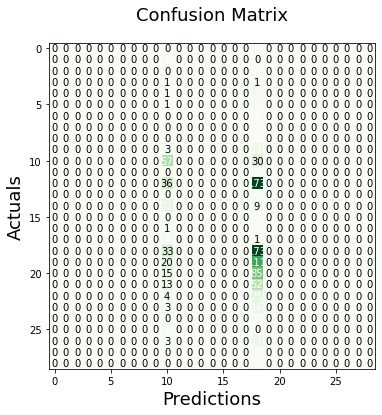

In [94]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [95]:
log_reg=accuracy_score(y_test,y_pred)
log_reg

0.24312896405919662

# **Random** **forest** **Model**

In [61]:
df2=final_df[['Industry_Vertical','Amount_in_USD','SubVertical','Investment_Type']]

In [62]:
from sklearn import preprocessing

#creating labelEncoder
lbl_encd = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df2.Industry_Vertical=lbl_encd.fit_transform(df2.Industry_Vertical)
df2.SubVertical=lbl_encd.fit_transform(df2.SubVertical)

In [63]:
df2.head()

Industry_Vertical  Amount_in_USD  SubVertical       Investment_Type
0                153    200000000.0          370  Private Equity Round
1                558      8048394.0           50              Series C
2                154     18358860.0         1258              Series B
3                203      3000000.0          972          Pre-series A
4                200      1800000.0          410            Seed Round

In [64]:
X_rf = df2[['Industry_Vertical','Amount_in_USD','SubVertical']]

In [65]:
y_rf = df2['Investment_Type']

In [66]:
#train_test_data_split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
Random_forest_model=RandomForestClassifier(n_estimators=100)

In [70]:
Random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
y_pred=Random_forest_model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.2219873150105708


# ARIMA 

In [96]:
final_df.head()

Sr_No       Date    Industry_Vertical  \
0      1 2009-03-02               E-Tech   
1      2 2009-03-03       Transportation   
2      3 2009-03-04           E-commerce   
3      4 2009-03-05              FinTech   
4      5 2009-03-06  Fashion and Apparel   

                             SubVertical       Investment_Type  Amount_in_USD  \
0                             E-learning  Private Equity Round    200000000.0   
1              App based shuttle service              Series C      8048394.0   
2  Retailer of baby and toddler products              Series B     18358860.0   
3                      Online Investment          Pre-series A      3000000.0   
4            Embroiled Clothes For Women            Seed Round      1800000.0   

   Days_Active  Consumer Internet  Technology  B2B Software  ...  Pre-Seed  \
0         5042                  0           0             0  ...         0   
1         5041                  0           0             0  ...         0   
2         5040                  0           0             0  ...         0   
3         5039                  0           0             0  ...         0   
4         5038                  0           0             0  ...         0   

   Seed/ Angel Funding  Series G  Seed / Angel Funding  Angel  \
0                    0         0                     0      0   
1                    0         0                     0      0   
2                    0         0                     0      0   
3                    0         0                     0      0   
4                    0         0                     0      0   

   Seed/Angel Funding  Debt Financing  Debt Funding  Seed Round  ICO  
0                   0               0             0           0    0  
1                   0               0             0           0    0  
2                   0               0             0           0    0  
3                   0               0             0           0    0  
4                   0               0             0           1    0  

[5 rows x 67 columns]

In [97]:
df3 = final_df[['Date','Industry_Vertical','Amount_in_USD','SubVertical','Investment_Type']]

In [98]:
df3['SubVertical'].nunique()

1547

In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4728 entries, 0 to 8051
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               4728 non-null   datetime64[ns]
 1   Industry_Vertical  4728 non-null   object        
 2   Amount_in_USD      4728 non-null   float64       
 3   SubVertical        4728 non-null   object        
 4   Investment_Type    4728 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 221.6+ KB


In [100]:
df3.set_index('Date',inplace=True)
df3

Industry_Vertical  Amount_in_USD  \
Date                                             
2009-03-02               E-Tech    200000000.0   
2009-03-03       Transportation      8048394.0   
2009-03-04           E-commerce     18358860.0   
2009-03-05              FinTech      3000000.0   
2009-03-06  Fashion and Apparel      1800000.0   
...                         ...            ...   
2019-11-20    Consumer Internet      3000000.0   
2019-11-22            eCommerce     25000000.0   
2019-11-25            ECommerce      5000000.0   
2019-11-26    Consumer Internet       500000.0   
2019-11-27      Food & Beverage       500000.0   

                                           SubVertical       Investment_Type  
Date                                                                          
2009-03-02                                  E-learning  Private Equity Round  
2009-03-03                   App based shuttle service              Series C  
2009-03-04       Retailer of baby and toddler products              Series B  
2009-03-05                           Online Investment          Pre-series A  
2009-03-06                 Embroiled Clothes For Women            Seed Round  
...                                                ...                   ...  
2019-11-20          Education & learning Tech platform                  Seed  
2019-11-22           Online Doctor Consulting platform                  Seed  
2019-11-25  Self-Branded Websites & Apps for Ecommerce              Series B  
2019-11-26      Cold Press Juice manufacturer & seller                  Seed  
2019-11-27                     Online lending platform              Series C  

[4728 rows x 4 columns]

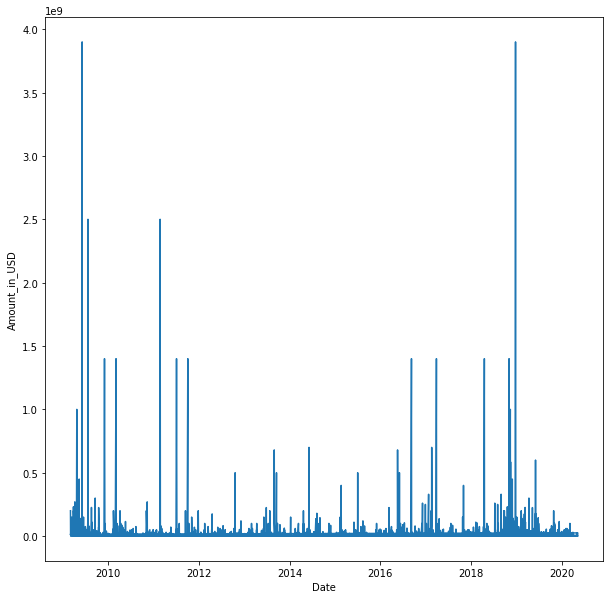

In [101]:
plt.xlabel('Date')
plt.ylabel('Amount_in_USD')
plt.plot(df3['Amount_in_USD'])

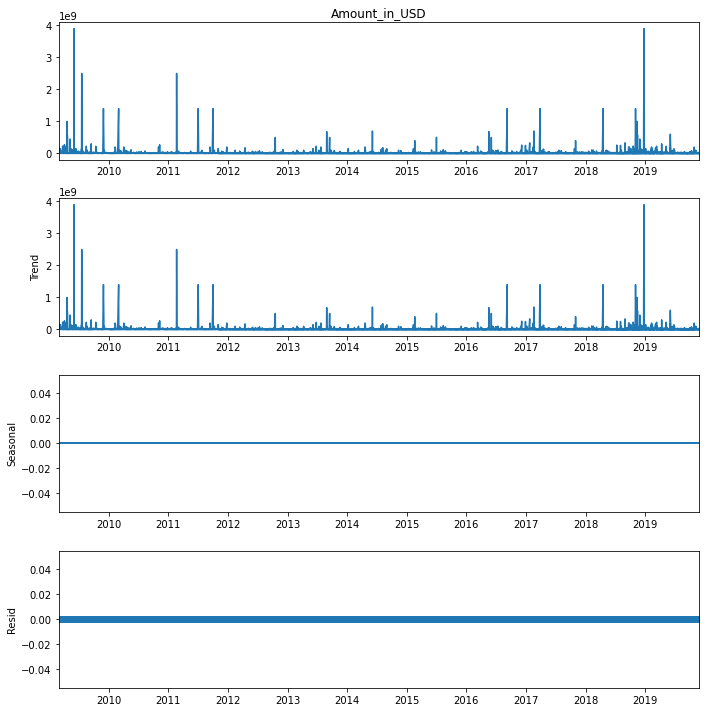

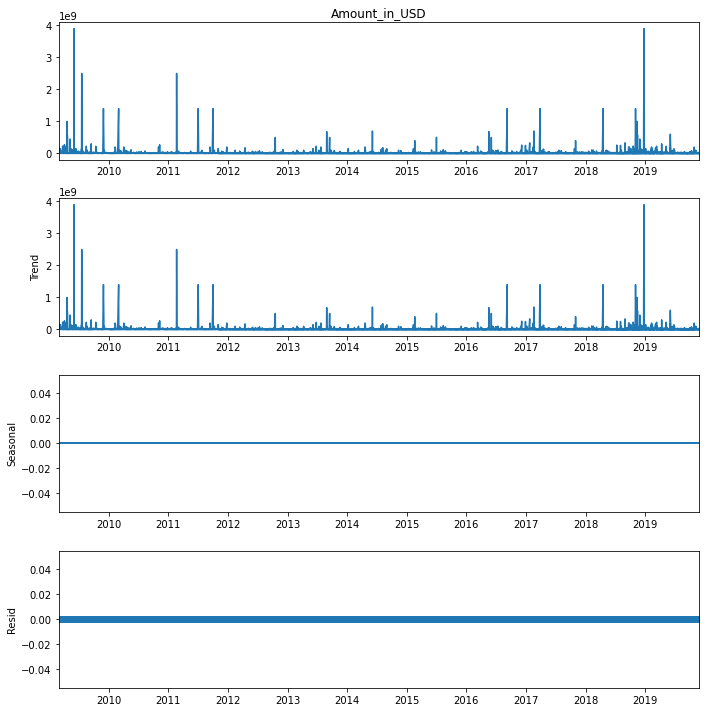

In [102]:

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df3['Amount_in_USD'], model='additive', period=1)
result.plot()